In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loads the dataset
df = pd.read_csv('../data/transactions.csv')

# Displays the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Gets a summary of the dataset
print("\nDataset Information:")
df.info()

# Gets descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Checks for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Descriptive Statistics:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00



Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [2]:
# Data Cleaning and Preprocessing

# Drops irrelevant columns
df_cleaned = df.drop(columns=['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'])

# Checks for duplicates
duplicate_rows = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Removes duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Checks first few rows of the cleaned dataset
print("\nFirst 5 rows of the cleaned dataset:")
display(df_cleaned.head())

# New info summary
print("\nCleaned Dataset Information:")
df_cleaned.info()

Number of duplicate rows: 97880

First 5 rows of the cleaned dataset:


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0



Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 6264740 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.4+ MB


In [3]:
# Feature Engineering

# Creates a copy to avoid modifying the cleaned dataframe directly
df_featured = df_cleaned.copy()

# Encodes the 'type' column
# This creates new columns like 'type_CASH_OUT'
type_dummies = pd.get_dummies(df_featured['type'], prefix='type', drop_first=True)
df_featured = pd.concat([df_featured, type_dummies], axis=1)
df_featured = df_featured.drop('type', axis=1) # Drops the original 'type' column

# Creates features to capture balance anomalies/errors
# Theoritically, oldbalanceOrg - amount = newbalanceOrig. If not, it's an anomaly.
df_featured['errorBalanceOrig'] = df_featured['oldbalanceOrg'] - df_featured['amount'] - df_featured['newbalanceOrig']
df_featured['errorBalanceDest'] = df_featured['oldbalanceDest'] + df_featured['amount'] - df_featured['newbalanceDest']


# Displays the first few rows with our new features
print("First 5 rows with new features:")
display(df_featured.head())

# Displays the new set of columns
print("\nNew list of columns:")
print(df_featured.columns)

First 5 rows with new features:


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,errorBalanceOrig,errorBalanceDest
0,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False,0.0,9839.64
1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False,0.0,1864.28
2,181.00,181.0,0.00,0.0,0.0,1,False,False,False,True,0.0,181.00
3,181.00,181.0,0.00,21182.0,0.0,1,True,False,False,False,0.0,21363.00
4,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False,0.0,11668.14



New list of columns:
Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER', 'errorBalanceOrig',
       'errorBalanceDest'],
      dtype='object')


Shape of X_train: (5011792, 11)
Shape of X_test: (1252948, 11)

Training the model...


c:\Users\brand\Documents\GitHub\Individual-Research-Project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:41:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.

--- Model Evaluation ---

Classification Report:
               precision    recall  f1-score   support

Not Fraud (0)       1.00      1.00      1.00   1251318
    Fraud (1)       0.95      0.99      0.97      1630

     accuracy                           1.00   1252948
    macro avg       0.98      1.00      0.99   1252948
 weighted avg       1.00      1.00      1.00   1252948


Confusion Matrix:
[[1251234      84]
 [      9    1621]]


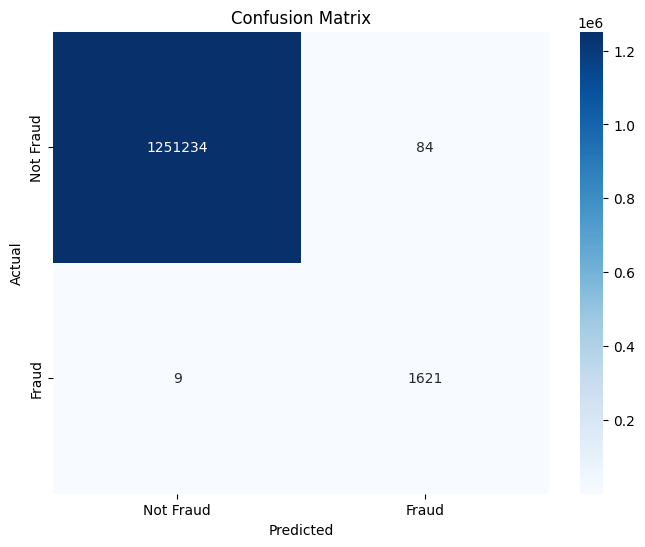

In [ ]:
# Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

# Defines features (X) and target (y)
X = df_featured.drop('isFraud', axis=1)
y = df_featured['isFraud']

# Splits the data into training and testing sets
# Uses 'stratify=y' to ensure that the proportion of fraudulent transactions
# is the same in both the training and testing sets. This is vital for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Trains the XGBoost Classifier
# 'scale_pos_weight' is a crucial parameter for imbalanced datasets.
# It tells the model to pay much more attention to the minority class (fraud cases).
# A common value is the ratio of negative class to positive class.
ratio = (y == 0).sum() / (y == 1).sum()

xgboost_transactions_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=ratio,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("\nTraining the model...")
xgboost_transactions_model.fit(X_train, y_train)
print("Model training complete.")

# Makes predictions on the test set
y_pred = xgboost_transactions_model.predict(X_test)

# Evaluates the model's performance
print("\n--- Model Evaluation ---")
print("\nClassification Report:")
# '1' represents Fraud, '0' represents Not Fraud
print(classification_report(y_test, y_pred, target_names=['Not Fraud (0)', 'Fraud (1)']))

# Displays the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualises the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [5]:
# Saves the Model
import joblib
import os

model_dir = '../models'

# Defines the file path for the model
model_path = os.path.join(model_dir, 'xgboost_transactions_model.joblib')

# Saves the trained model to the file
joblib.dump(xgboost_transactions_model, model_path)

print(f"Model saved successfully to: {model_path}")

Model saved successfully to: ../models\xgboost_transactions_model.joblib


In [6]:
# Creates a small sample file for testing the Streamlit app

# Makes sure the original DataFrame 'df' is still in memory. 
# If you get a NameError, re-run the first cell of the notebook to load the data again.
normal_samples = df[df['isFraud'] == 0].head(10)
fraud_sample = df[df['isFraud'] == 1].head(1)

# Combines the normal and fraudulent transactions into one DataFrame
test_df = pd.concat([normal_samples, fraud_sample])

# Randomises the order of the rows so the fraud isn't always at the bottom
test_df = test_df.sample(frac=1).reset_index(drop=True)

# Saves this small DataFrame to a new CSV file in our 'data' folder
test_file_path = '../data/test_transactions.csv'
test_df.to_csv(test_file_path, index=False)

print(f"Test file 'test_transactions.csv' created successfully in the 'data' folder!")
display(test_df)

Test file 'test_transactions.csv' created successfully in the 'data' folder!


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
1,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
2,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0
3,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
4,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
5,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
6,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
7,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
8,1,PAYMENT,3099.97,C249177573,20771.00,17671.03,M2096539129,0.0,0.00,0,0
9,1,DEBIT,9644.94,C1900366749,4465.00,0.00,C997608398,10845.0,157982.12,0,0


In [7]:
# Creates a larger, more complex test file to simulate a real-world scenario.

# Ensures the original DataFrame 'df' is still in memory.
# If you get a NameError, re-run the first cell of the notebook to load the data.

# It takes a random sample of 10,000 transactions from the original dataset.
# Using a random sample preserves the natural distribution of fraud vs. non-fraud cases.
if 'df' in locals():
    complex_test_df = df.sample(n=10000, random_state=42) # random_state for reproducibility

    # It saves the full data WITH the 'isFraud' column to a 'ground_truth' file.
    # Then creates a separate file WITHOUT the 'isFraud' column to upload to the app.
    # This mimics a real-world scenario where you have the data to test against later.

    # File to be uploaded to the app (without the answer)
    upload_file = complex_test_df.drop(columns=['isFraud'])
    upload_file_path = '../data/transactions_upload_file.csv'
    upload_file.to_csv(upload_file_path, index=False)
    
    # The ground truth file (with the answer, for validation)
    ground_truth_file_path = '../data/complex_ground_truth.csv'
    complex_test_df.to_csv(ground_truth_file_path, index=False)

    num_fraud = complex_test_df['isFraud'].sum()
    
    print(f"Successfully created two files in the 'data' folder:")
    print(f"1. 'complex_upload_file.csv' ({len(upload_file)} rows) - Use this file in the Streamlit app.")
    print(f"2. 'complex_ground_truth.csv' - This contains the actual answers for our reference.")
    print(f"\nThe complex test set contains {num_fraud} actual fraudulent transactions.")

else:
    print("DataFrame 'df' not found. Please re-run the initial data loading cell.")

Successfully created two files in the 'data' folder:
1. 'complex_upload_file.csv' (10000 rows) - Use this file in the Streamlit app.
2. 'complex_ground_truth.csv' - This contains the actual answers for our reference.

The complex test set contains 19 actual fraudulent transactions.


Creating SHAP explainer...
Explainer created.
Calculating SHAP values for the test set...
SHAP values calculated.

Example SHAP force plot for a single fraudulent transaction:


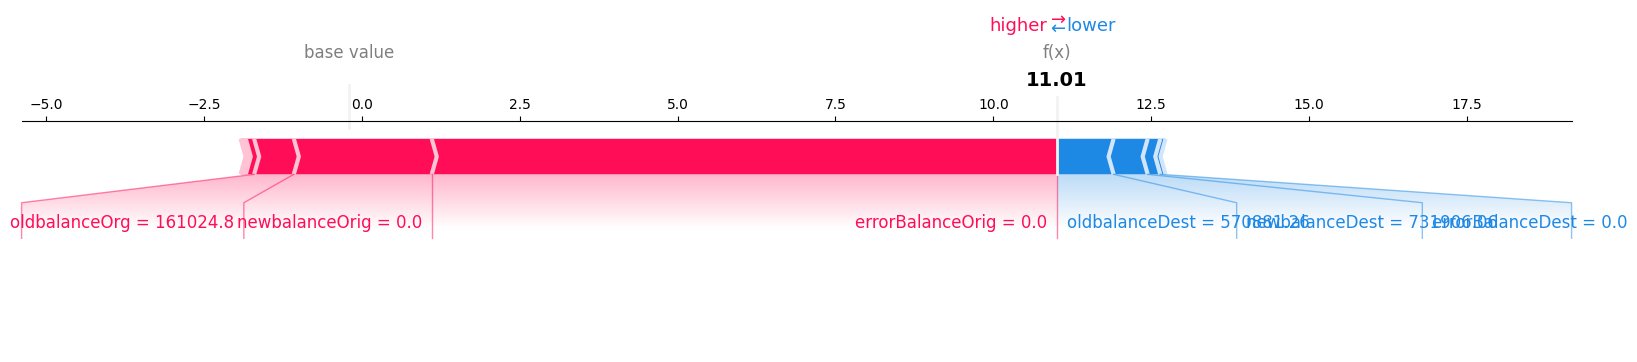


SHAP explainer saved successfully to: ../models/shap_explainer_xgboost_transactions.joblib


In [8]:
# Model Interpretability with SHAP
import shap

# Ensure the model and test data (X_test) are in memory from the previous cells.

# Create a SHAP TreeExplainer object.
# This object is optimised for tree-based models like XGBoost.
print("Creating SHAP explainer...")
shap_explainer_xgboost_transactions = shap.TreeExplainer(xgboost_transactions_model)
print("Explainer created.")

# Calculates SHAP values for our test set
print("Calculating SHAP values for the test set...")
shap_values = shap_explainer_xgboost_transactions.shap_values(X_test)
print("SHAP values calculated.")

# Visualises a single prediction to see how it works
# This force plot shows features pushing the prediction higher (red) or lower (blue).
print("\nExample SHAP force plot for a single fraudulent transaction:")
# Finds a fraudulent transaction in the test set to explain
fraud_index = np.where(y_test == 1)[0][0]
shap.force_plot(shap_explainer_xgboost_transactions.expected_value, shap_values[fraud_index,:], X_test.iloc[fraud_index,:], matplotlib=True)

# Saves the SHAP explainer object for use in Streamlit app
explainer_path = '../models/shap_explainer_xgboost_transactions.joblib'
joblib.dump(shap_explainer_xgboost_transactions, explainer_path)
print(f"\nSHAP explainer saved successfully to: {explainer_path}")

In [9]:
# Creates a Larger, 280k-row Sample File for Performance testing

print("\nCreating a larger, ~280k-row sample file...")

# This assumes the 'df_cleaned' DataFrame (from which duplicates were dropped) is in memory.
if 'df_cleaned' in locals():
    # Gets all fraudulent transactions to ensure they are included in the sample.
    all_fraud_large_sample = df_cleaned[df_cleaned['isFraud'] == 1]
    num_fraud = len(all_fraud_large_sample)

    # Calculates how many non-fraudulent transactions is needed to reach ~280,000 total rows.
    num_non_fraud_to_sample = 280000 - num_fraud
    
    # Takes a random sample of the required number of non-fraudulent transactions.
    some_non_fraud_large_sample = df_cleaned[df_cleaned['isFraud'] == 0].sample(
        n=num_non_fraud_to_sample, 
        random_state=42 # ensures it gets the same sample every time
    )

    # Combines the fraudulent and non-fraudulent transactions.
    large_simulation_sample_df = pd.concat([all_fraud_large_sample, some_non_fraud_large_sample])

    # Shuffles the combined dataframe to mix the transaction types randomly.
    large_simulation_sample_df = large_simulation_sample_df.sample(frac=1).reset_index(drop=True)

    # Defines the path and saves the new sample file to the 'data' folder.
    output_path_large = '../data/transactions_sample_280k.csv'
    large_simulation_sample_df.to_csv(output_path_large, index=False)

    print(f"\nSuccessfully created '{output_path_large.split('/')[-1]}'")
    print(f"Total rows: {len(large_simulation_sample_df)}")
    print(f"Fraudulent transactions included: {num_fraud}")
else:
    print("Please ensure the 'df_cleaned' DataFrame is available from running previous cells.")


Creating a larger, ~280k-row sample file...

Successfully created 'transactions_sample_280k.csv'
Total rows: 280000
Fraudulent transactions included: 8152
